# Projeto 1 - Ciência dos Dados

### Nome: Beatriz Rianho Bernardino

## Introdução

<font size="3">  <p style='text-align: justify;'> Criada em 2002 e inspirada na União Europeia, a União Africana é uma organização internacional que tem como objetivo promover a democratização, paz e o desenvolvimento econômico em todo o continente. Atualmente, 55 países fazem parte dessa organização. Apesar da UA ter promovido melhorias, a África continua sendo um continente subdesenvolvido no qual há países com uma boa economia, como a África do Sul e outros em que as pessoas passam por diversas dificuldades diárias, como falta de acesso ao sanemanto e água, por exemplo. Esse fato deve ser levado em consideração durante o projeto pois há uma desconformidade entre alguns dados, e, por isso, toda a análise foi feita uilizando-se a mediana ao invés da média. </font>

## Pergunta (s) a ser respondida

<font size="3">Após a criação da União Africana, os países membros tiveram um aumento de investimentos, e por isso a expectativa de vida aumentou ? </font>

## Explicação da hipótese e mecanismo

<font size="3"> **Hipótese**: <p style='text-align: justify;'> 
    Os países membros provavelmente obtiveram uma melhora no índice de investimentos, e,consequentemente, maior acesso ao saneamento, aumentando a expectativa de vida.  </p> </font>

<font size="3">  <p style='text-align: justify;'> 
**Mecanismo**:  <p style='text-align: justify;'> 
        Como um dos objetivos da União Africana é promover odesenvolvimento econômico, foi criado um programa chamado  Nova Parceria para o Desenvolvimento da África, que incentiva o aumento dos investimentos de países extrangeiros na África. Por isso, junto com as políticas de proteção dos direitos humanos, se realmente houve um aumento de investimentos, a economia  deve ter melhorado, e, consequentemente, o governo promoveu uma melhora no saneamento básico.  Como o saneamento básico ajuda a diminuir a proliferação de doenças, a expectativa de vida também deve ter aumentado. </p> </font>

####  Referências: 
- http://theconversation.com/lifestyle-diseases-could-scupper-africas-rising-life-expectancy-107220. <br> ( mostra que uma das causas para a expectativa de vida ter aumentado é devido a melhora no saneamento )


- https://www.impactatafrica.org/sites/default/files/publications/impact_investment_in_africa_action_plan_2016_english.pdf ( item 2 mostra dados de que desde 2002, ano em que a UA foi criada, o número de investimentos aumentou)


## Bases de dados usadas

<font size="3"> <p style='text-align: justify;'> 

- Dados sobre os **INVESTIMENTOS**: <br>
https://data.worldbank.org/indicator/NE.GDI.TOTL.ZSte 

<BR>

- Dados sobre **SANEAMENTO**: <br>
https://data.worldbank.org/indicator/SH.STA.SMSS.ZS

<BR>
    
- Dados sobre **EXPECTATIVA DE VIDA**: <Br>
https://www.gapminder.org/data/documentation/gd004/


</font>

## Análise de dados

### 1. Análise dos investimentos

In [3]:
#importando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

<font size="2"> <p style='text-align: justify;'> Primeiramente, vamos observar se realmente houve uma melhora nos investimentos devido à criação da UA, ou se foi apenas um aumento que ocorreu no mundo inteiro: </font>

In [90]:
data=pd.read_excel('investimentos.xlsx')

In [91]:
#criando uma coluna qualitativa sobre os membros:

lista=["Algeria", "Angola", "Benin", 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde',  'Cameroon','Central African Republic','Chad', 'Comoros', 'Congo, Dem. Rep.', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',  'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Lybia',  'Madagascar' , 'Malawi',]
membros=[]
for pais in data["country"]:
    if pais in lista:
        membros.append("sim")
    else: 
        membros.append("não")
        
data["Membros"]=membros
data.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Membros
0,Afghanistan,16.1,16.6,19.1,14.2,13.9,11.3,8.41,5.18,6.47,...,17.9,17.9,16.6,16.8,17.2,18.1,19.4,17.7,NaN,não
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.6,30.3,31.4,28.3,28.4,24.6,24.4,24.8,25.2,não
2,Algeria,42.2,47.2,35.4,28.9,21.8,22.6,17.30,23.40,27.90,...,46.9,41.4,38.1,39.2,43.4,45.6,50.7,50.7,47.8,sim


In [92]:
# selecionando uma janela de dados que abrangem 10 anos antes e 10 anos depois do bloco econômico ser criado
investimento=data.set_index("country")
anos=investimento.iloc[:,32:52]
investimentos=anos.dropna()
investimentos.head(3)

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,
Albania,5.2,13.2,17.9,21.0,21.2,20.5,21.0,23.0,31.7,38.4,37.9,40.5,37.2,37.0,39.0,38.7,35.8,34.6,30.3,31.4
Algeria,30.8,29.1,30.1,30.9,25.7,22.4,27.1,26.2,23.6,26.8,30.7,30.3,33.3,31.7,30.2,34.5,37.3,46.9,41.4,38.1
Argentina,16.7,19.1,19.9,17.9,18.1,19.4,19.9,18.0,16.2,14.2,12.0,15.1,17.6,18.9,18.7,20.1,19.6,16.1,17.7,18.4


In [93]:
#filtrando a tabela para os países membros e não membros
paises_ua=investimentos[(investimentos.index=='Algeria') |(investimentos.index=='Angola')|(investimentos.index=='Benin')|(investimentos.index=='Botswana')|(investimentos.index=='Burkina Faso')|(investimentos.index=='Burundi')|(investimentos.index=='Cape Verde')|(investimentos.index=='Cameroon')|(investimentos.index=='Central African Republic')|(investimentos.index=='Chad')|(investimentos.index=='Comoros')|(investimentos.index=='Congo, Dem. Rep.')|(investimentos.index=='Djibouti')|(investimentos.index=='Egypt')|(investimentos.index=='Equatorial Guinea')|(investimentos.index=='Eritrea')|(investimentos.index=='Eswatini')|(investimentos.index=='Ethiopia')|(investimentos.index=='Gabon') |(investimentos.index=='Gambia')|(investimentos.index=='Ghana')|(investimentos.index=='Guinea')|(investimentos.index=='Guinea-Bissau')|(investimentos.index=='Ivory Coast')|(investimentos.index=='Kenya')|(investimentos.index=='Lesotho')|(investimentos.index=='Liberia')|(investimentos.index=='Lybia') |(investimentos.index=='Madagascar') |(investimentos.index=='Malawi')|(investimentos.index=='Mali')|(investimentos.index=='Mauritania')|(investimentos.index=='Mauritius')|(investimentos.index=='Morocco')|(investimentos.index=='Mozambique')|(investimentos.index=='Namibia')|(investimentos.index=='Niger')|(investimentos.index=='Nigeria')|(investimentos.index=='Rwanda')|(investimentos.index=='Senegal') |(investimentos.index=='Seychelles') |(investimentos.index=='Congo, Rep')|(investimentos.index=='Sierra Leone')|(investimentos.index=='Somalia')|(investimentos.index=='South Africa')|(investimentos.index=='South Sudan')|(investimentos.index=='Tanzania')|(investimentos.index=='Togo')|(investimentos.index=='Tunisia') |(investimentos.index=='Uganda')|(investimentos.index=='Zambia') |(investimentos.index=='Zimbabwe')]
paises_fora=investimentos[(investimentos.index=='Brazil') | (investimentos.index=='Mexico') |(investimentos.index=='Argentina') |(investimentos.index=='Venezuela') |(investimentos.index=='Colombia') |(investimentos.index=='Chile') |(investimentos.index=='Peru') |(investimentos.index=='Ecuador') |(investimentos.index=='Dominican Republic') |(investimentos.index=='Porto Rico') |(investimentos.index=='Guatemala') |(investimentos.index=='Costa Rica') |(investimentos.index=='Bolivia') |(investimentos.index=='Uruguai') |(investimentos.index=='El Salvador') |(investimentos.index=='Panama') |(investimentos.index=='Paraguai') |(investimentos.index=='Honduras') |(investimentos.index=='Nicaragua') |(investimentos.index=='Haiti') |(investimentos.index=='Jamaica') |(investimentos.index=='Guiana') |(investimentos.index=='Suriname') |(investimentos.index=='Equatorial Guinea') |(investimentos.index=='Portugal') |(investimentos.index=='Hungary') |(investimentos.index=='Philippines')|(investimentos.index=='Swaziland') |(investimentos.index=='Fiji') |(investimentos.index=='Indonesia') |(investimentos.index=='Malaysia') |(investimentos.index=='Romania')|(investimentos.index=='Thailand')|(investimentos.index=='Singapore')|(investimentos.index=='Belgium')|(investimentos.index=='Czech Republic')|(investimentos.index=='Barbados')|(investimentos.index=='Belize')|(investimentos.index=='Croatia')|(investimentos.index=='Hungria')|(investimentos.index=='Egypt')|(investimentos.index=='El Salvador')|(investimentos.index=='Finland')|(investimentos.index=='Jordan')|(investimentos.index=='Togo')|(investimentos.index=='New Zealand') ]

**obs** : Os países selecionados para o grupo de controle são países sub-desenvolvidos ou em desenvolvimento, principalmente da América do Sul, por suas semelhanças ecônomicas com a África. 

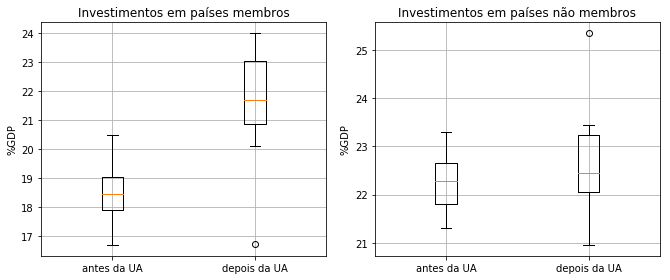

In [80]:
#plotando um boxplot de antes e depois
colunas_antes = paises_fora.columns <2002
colunas_depois = paises_fora.columns>=2002

plt.figure(figsize=(14, 4))
plt.subplot(131)


plt.boxplot([paises_ua.loc[:, colunas_antes].median().values, 
             paises_ua.loc[:, colunas_depois].median().values])
plt.gca().set_xticklabels(['antes da UA', 'depois da UA'])
plt.title('Investimentos em países membros')
plt.ylabel('%GDP')
plt.grid(which='both')
plt.tight_layout()
plt.subplot(132)
plt.boxplot([paises_fora.loc[:, colunas_antes].median().values, 
             paises_fora.loc[:, colunas_depois].median().values])
plt.gca().set_xticklabels(['antes da UA', 'depois da UA'])
plt.title('Investimentos em países não membros')
plt.ylabel('%GDP')
plt.grid(which='both')
plt.tight_layout()
plt.show()


<font size="2">  <p style='text-align: justify;'>  Através dos boxplots, é possível perceber que o crecimento dos investimentos nos países membros depois que a UA foi criada é maior, quando comparado com os que não fazem. Enquanto a mediana dos membros aumentou cerca de 3%GDP, a dos países não membros diminuiu cerca de 0,25%GDP. 
 <br>   
**Análise dos países membros**:
<p style='text-align: justify;'>
Antes da criação da organização, metade dos países possuíam investimentos entre 17.91%GDP e 19.03%GDP com uma mediana de 18.45%GDP. Já depois da UA, metade dos países membros possuem investimentos entre 20.87%GDP e 23.02 %GDP, com uma mediana de 21.7%GDP.

    
**Análise dos países não membros**:
<p style='text-align: justify;'>  
Antes da criação da organização, metade dos países possuíam investimentos entre 21.3/%GDP e 12.6/%GDP com uma mediana de 22.7%GDP. Já depois da UA, metade dos países membros possuem investimentos entre 22.0%GDP e 23.23 %GDP, com uma mediana de 22.45%GDP.

</font>

Agora que a primeira parte da pergunta foi comprovada, é necessário observar as correlações entre os investimentos e as outras duas variáveis. Para isso, será levado em consideração apenas os países membros e os anos após a criação da UA. </font>

### 2. Análise bidimensional quantitativa

In [57]:
#começando com o saneamento
dados=pd.read_excel('saneamento.xlsx')
investimentoss=dados.set_index("country")
membros=investimentoss[(investimentoss.index=='Algeria') |(investimentoss.index=='Benin')|(investimentoss.index=='Botswana')|(investimentoss.index=='Burkina Faso')|(investimentoss.index=='Burundi')|(investimentoss.index=='Cameroon')|(investimentoss.index=='Central African Republic')|(investimentoss.index=='Chad')|(investimentoss.index=='Comoros')|(investimentoss.index=='Congo, Dem. Rep.')|(investimentoss.index=='Egypt')|(investimentoss.index=='Equatorial Guinea')|(investimentoss.index=='Eritrea')|(investimentoss.index=='Gabon') |(investimentoss.index=='Gambia')|(investimentoss.index=='Ghana')|(investimentoss.index=='Guinea')|(investimentoss.index=='Guinea-Bissau')|(investimentoss.index=='Ivory Coast')|(investimentoss.index=='Kenya')|(investimentoss.index=='Madagascar') |(investimentoss.index=='Malawi')|(investimentoss.index=='Mali')|(investimentoss.index=='Mauritania')|(investimentoss.index=='Mauritius')|(investimentoss.index=='Morocco')|(investimentoss.index=='Mozambique')|(investimentoss.index=='Namibia')|(investimentoss.index=='Niger')|(investimentoss.index=='Nigeria')|(investimentoss.index=='Rwanda')|(investimentoss.index=='Senegal') |(investimentoss.index=='Sierra Leone')|(investimentoss.index=='South Africa')|(investimentoss.index=='Tanzania')|(investimentoss.index=='Togo')|(investimentoss.index=='Tunisia') |(investimentoss.index=='Uganda')|(investimentoss.index=='Zimbabwe')]
saneamento=membros.iloc[:,2:12]
saneamento.dropna(inplace=True)
saneamento.head(3)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,
Algeria,84.4,84.7,85.0,85.3,85.6,85.8,86.1,86.3,86.6,86.8
Benin,10.5,10.7,11.0,11.2,11.5,11.7,12.0,12.3,12.5,12.8
Botswana,55.4,55.8,56.2,56.6,57.0,57.4,57.8,58.2,58.6,59.0


In [72]:
#calculando as medianas da tabela de investimentos, para os mesmos anos e países.
mdinvest=paises_ua.iloc[:,10:]
medianin=mdinvest.median()
medianinv=pd.DataFrame(data=medianin, columns = ['mediana_investimentos'])

In [73]:
#agora para o saneamento
md1=saneamento.median()
median=pd.DataFrame(data=md1, columns = ['mediana_saneamento'])

In [74]:
#juntando as tabelas 
tabela=medianinv.join(median, how='inner')
tabela

,mediana_investimentos,mediana_saneamento
2002,16.75,28.40
2003,20.10,28.85
2004,21.10,29.30
2005,20.80,30.15
2006,21.15,30.50
2007,22.25,30.65
2008,23.60,31.15
2009,22.65,31.55
2010,23.15,32.00
2011,24.00,32.45


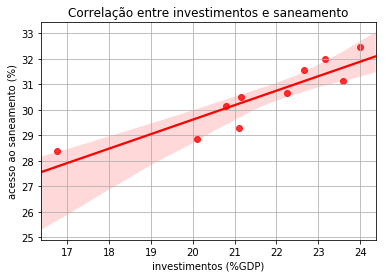

Correlação: 0.8967041376391687



In [78]:
#observando a correlação e plotando o gráfico de dispersão
cor=tabela.corr()

sns.regplot(tabela['mediana_investimentos'], tabela['mediana_saneamento'], color=('red'))
plt.xlabel('investimentos (%GDP)')
plt.ylabel('acesso ao saneamento (%)')
plt.title("Correlação entre investimentos e saneamento")
plt.grid()
plt.show()

print("Correlação: {}\n".format(cor['mediana_investimentos']['mediana_saneamento']))



<p style='text-align: justify;'> 
A partir do gráfico, e possível perceber que existe pouca dispersão nos pontos, que também pode ter sido causada por estarmos observando uma janela de dados relativamente pequena. Mesmo assim, existe uma alta correlação(0.89). Com isso, podemos perceber que o acesso ao saneamento e os investimentos estão associados. 

Uma vez que a correlação entre saneamento obtida foi alta, é necessário observar agora a correlação entre saneamento e expectativa de vida:

In [79]:
#abrindo o arquivo e filtrando o dataframe
data=pd.read_excel('expectativadevida.xlsx')
investimento=data.set_index("country")
expec=investimento[(investimento.index=='Algeria') |(investimento.index=='Angola')|(investimento.index=='Benin')|(investimento.index=='Botswana')|(investimento.index=='Burkina Faso')|(investimento.index=='Burundi')|(investimento.index=='Cape Verde')|(investimento.index=='Cameroon')|(investimento.index=='Central African Republic')|(investimento.index=='Chad')|(investimento.index=='Comoros')|(investimento.index=='Congo, Dem. Rep.')|(investimento.index=='Djibouti')|(investimento.index=='Egypt')|(investimento.index=='Equatorial Guinea')|(investimento.index=='Eritrea')|(investimento.index=='Eswatini')|(investimento.index=='Ethiopia')|(investimento.index=='Gabon') |(investimento.index=='Gambia')|(investimento.index=='Ghana')|(investimento.index=='Guinea')|(investimento.index=='Guinea-Bissau')|(investimento.index=='Ivory Coast')|(investimento.index=='Kenya')|(investimento.index=='Lesotho')|(investimento.index=='Liberia')|(investimento.index=='Lybia') |(investimento.index=='Madagascar') |(investimento.index=='Malawi')|(investimento.index=='Mali')|(investimento.index=='Mauritania')|(investimento.index=='Mauritius')|(investimento.index=='Morocco')|(investimento.index=='Mozambique')|(investimento.index=='Namibia')|(investimento.index=='Niger')|(investimento.index=='Nigeria')|(investimento.index=='Rwanda')|(investimento.index=='Senegal') |(investimento.index=='Seychelles') |(investimento.index=='Congo, Rep')|(investimento.index=='Sierra Leone')|(investimento.index=='Somalia')|(investimento.index=='South Africa')|(investimento.index=='Tanzania')|(investimento.index=='Togo')|(investimento.index=='Tunisia') |(investimento.index=='Uganda')|(investimento.index=='Zambia') |(investimento.index=='Zimbabwe')]
expectativa=expec.iloc[:,202:212]
expectativa.head(3)

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,
Algeria,74.4,74.5,75.1,75.4,75.6,75.9,76.1,76.3,76.5,76.7
Angola,54.5,55.1,55.7,56.5,57.0,57.8,58.6,59.3,60.1,60.9
Benin,58.2,58.6,59.0,59.5,59.9,60.3,60.8,61.4,61.8,62.2


In [70]:
#calculando as medianas
med=expectativa.median()
med
mediana2=pd.DataFrame(data=med, columns = ['mediana_expectativadevida'])


In [77]:
corr_san_exp=mediana2.join(median, how='inner')
corr_san_exp

,mediana_expectativadevida,mediana_saneamento
2002,54.5,28.40
2003,55.1,28.85
2004,55.8,29.30
2005,56.5,30.15
2006,57.1,30.50
2007,57.8,30.65
2008,58.6,31.15
2009,59.3,31.55
2010,60.1,32.00
2011,60.9,32.45


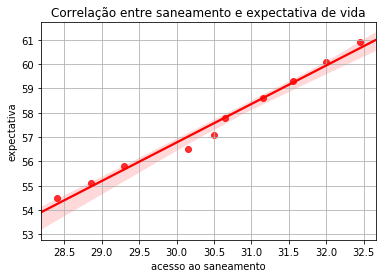

Correlação: 0.9918385144211983



In [69]:
#observando a correlação e plotando o gráfico de dispersão
cor=corr_san_exp.corr()

sns.regplot(corr_san_exp['mediana_saneamento'], corr_san_exp['mediana_expectativadevida'], color=('red'))
plt.xlabel('acesso ao saneamento (%)')
plt.ylabel('expectativa (anos)')
plt.title("Correlação entre saneamento e expectativa de vida")
plt.grid()
plt.show()

print("Correlação: {}\n".format(cor['mediana_saneamento']['mediana_expectativadevida']))


Com esse gráfico de dispersão, conseguimos observar que as duas variáveis estão intimamente associadas, com uma correlação de 0.99. Com isso, validamos a hipótese de que os investimentos causam, indiretamente, um aumento na expectativa de vida.

## 3. Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

<p style='text-align: justify;'>      
Depois de toda a análise de dados, é possível concluir que a hipótese criada no começo do projeto foi validada.
A primeira pergunta foi respondida através de dados sobre a % de investimentos por renda per capita, sempre levando em consideração 10 anos antes (1992-2001), e 10 anos depois (2002-2011). Através do boxplot foi possível observar que enquanto a mediana dos países membros aumentou cerca de 3%, a dos que não pertenciam à UA na verdade abaixou cerca de 0,25%. Isso é razoável pois que a União Africana criou o projeto de incentivo ecônomico, no qual promovia que os países extrangeiros investissem na África. 
    
<p style='text-align: justify;'>    
Com isso, foi razoável descobrir que a correlação entre o saneamento e o aumento dos investimentos era alta e com uma associação positiva, mostrando que  pois com o aumento dos investimentos, o governo passou a conseguir destinar uma maior quantia para melhorias no saneamento, lembrando que como esse crescimento foi relativamente baixo, ainda existem muitas áreas sem acesso. Essa análise foi feita através de uma base de dados sobre o acesso ao saneamento e água potável, e foram utilizados apenas os anos depois da criação da União Africana.
    
<p style='text-align: justify;'>      
    Com a melhora no acesso ao saneamento e água potável, a proliferação de doenças diminui, junto com a taxa de mortalidade infantil, que abaixou cerca de 35% desde 2000 segundo o site de rigor acadêmico "the conversation", e, portanto, a expectativa de vida aumenta. Isso foi comprovado com o gráfico de dispersão e correlação de quase 1.0, mostrando que os dois fatores estão intimamente ligados.
 <p style='text-align: justify;'>   
    Para futuras melhorias, seria ideal se a janela de dados analisados para as correlações e gráficos de dispersão fosse maior, o que não foi possível em primeiro momento devido a falta de dados. Isso pode ter causado uma conclusão ilusória, e portanto existe a possibilidade de a correlação ser menor.
 

## 4. Fontes

- https://theconversation.com/lifestyle-diseases-could-scupper-africas-rising-life-expectancy-107220

- https://pt.wikipedia.org/wiki/Uni%C3%A3o_Africana